# Subaru Sakashita

## Research question/interests

Briefly describe your research question or interests here.

What games are popular in Japan?

To what extent is people's preference similar?

What type of games contributed to global sales in each major platform?

What is the general trend for each platform?

In [1]:
import pandas as pd
d = pd.read_csv('../data/raw/Video_Games.csv');
d

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN



## Clean up 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns#Understanding my variables
df_cleaned = d.copy()
df_cleaned = df_cleaned.copy().drop(['Critic_Count','User_Score','Rating','User_Count'], axis=1) #getting ride of crisitc_count, user_score, rating, and user_count rows
df_cleaned = df_cleaned.dropna(axis=0) #remove rows with null 
df_cleaned = df_cleaned[df_cleaned['NA_Sales'] >= 0] #filter out NA sales less than 0
df_cleaned = df_cleaned[df_cleaned['EU_Sales'] >= 0] #filter out EU sales less than 0
df_cleaned = df_cleaned[df_cleaned['JP_Sales'] >= 0] #filter out JP sales less than 0
df_cleaned = df_cleaned[df_cleaned['Other_Sales'] >= 0] #filter out Other sales less than 0

df_cleaned



,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,Nintendo
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,Atomic Games
16701,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,53.0,Taito Corporation
16702,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01,48.0,Interchannel-Holon
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,SimBin


<AxesSubplot:>

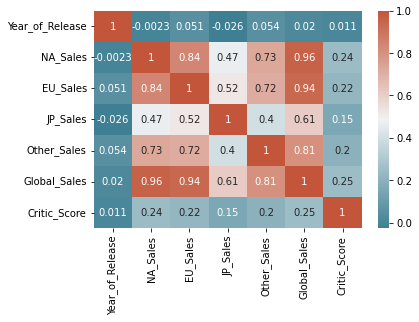

In [3]:
corr = df_cleaned.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


There is a positive correlation between sales in different regions. 
The graph also tells that Year of Release is negatively correlated with the sales. 



<AxesSubplot:xlabel='Year_of_Release', ylabel='Global_Sales'>

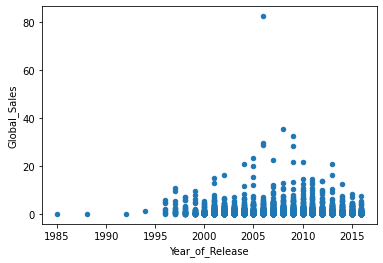

In [4]:
df_cleaned.plot(kind='scatter', x='Year_of_Release', y='Global_Sales')


The scatterplot tells us that video games started to gain its popularity from 1995.
Many games have the global sales around 10~15 million. But there is one game that made a great sales of over 80 million. 

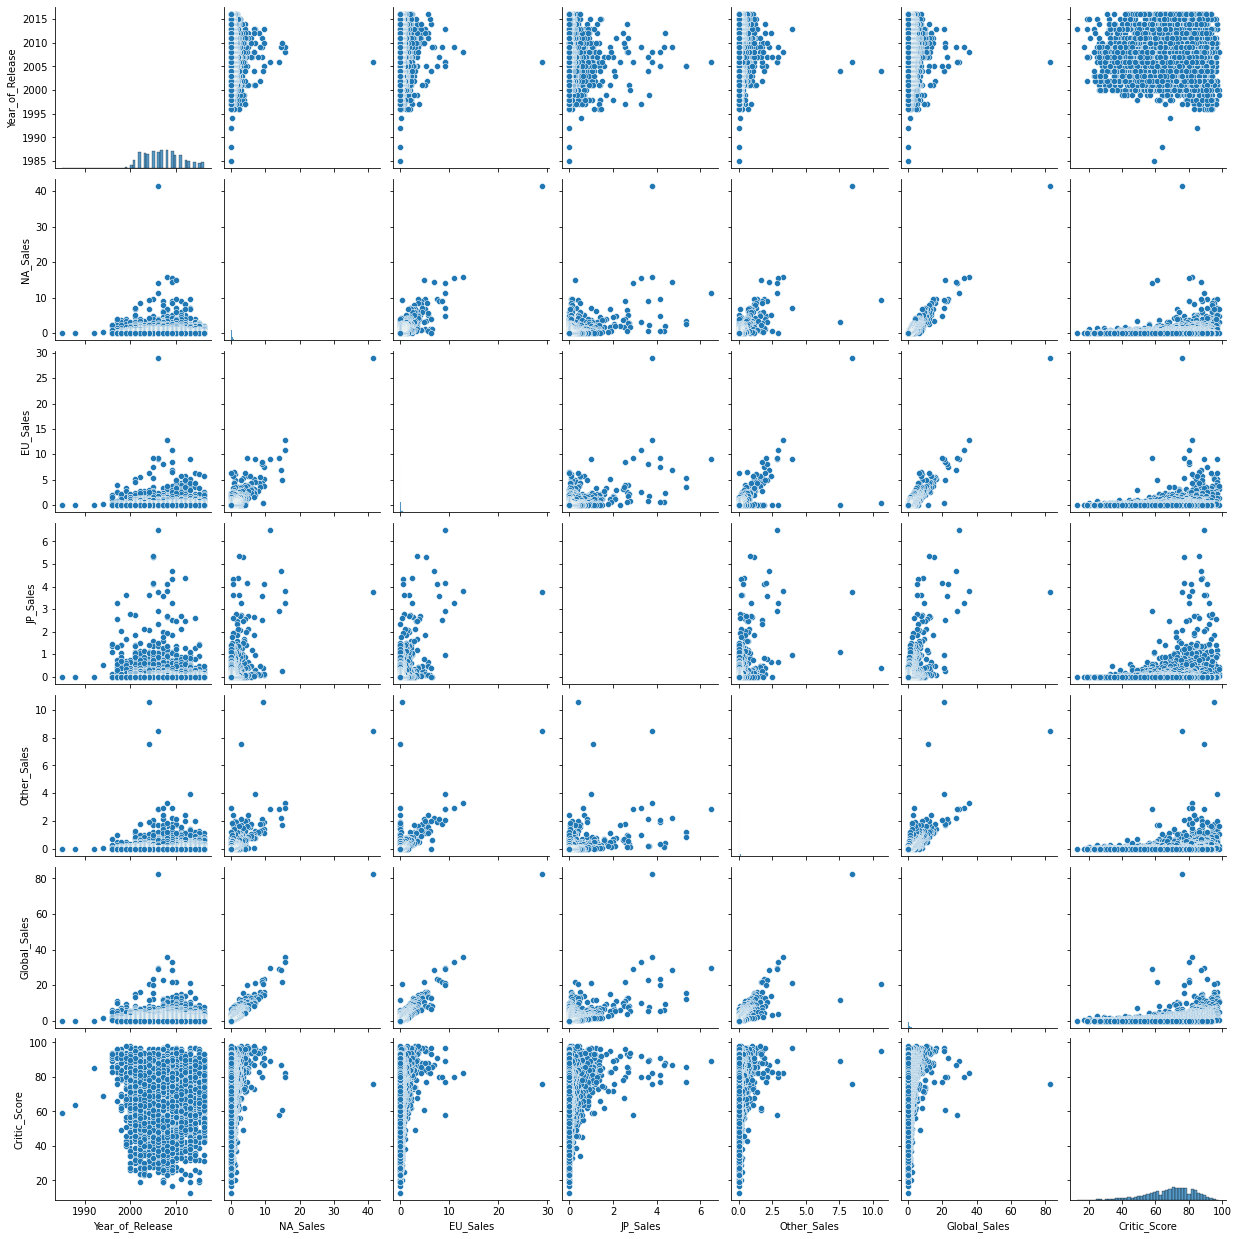

In [5]:
sns.pairplot(df_cleaned)

As you can see, outliers are see in most of the graphs. It would be interesting to look into those outliers. 


<AxesSubplot:xlabel='Platform', ylabel='count'>

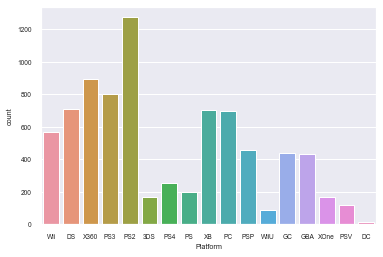

In [6]:

sns.set(font_scale=0.6)
sns.countplot(x=df_cleaned["Platform"])

This graph shows that PS2 has the most number of games. 

<AxesSubplot:xlabel='Platform', ylabel='count'>

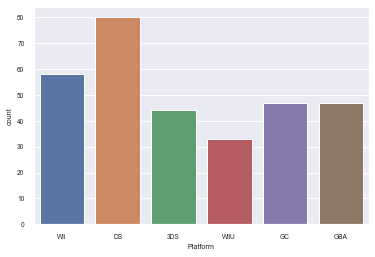

In [7]:
df2 = df_cleaned.copy()
df2 = df2[df2['Publisher'] == "Nintendo"]
df2
sns.countplot(x=df2["Platform"])


[Text(0.5, 1.0, 'Number of genres')]

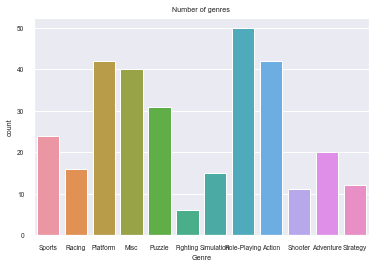

In [8]:
sns.countplot(x=df2["Genre"]).set(title="Number of genres")

The graph show

## Method Chaining

In [9]:
df = (  
    pd.read_csv("../data/raw/Video_Games.csv")
    .drop(['User_Count','Critic_Count', 'Rating','User_Score'], axis=1)
    .dropna(axis=0)
    .loc[lambda x: x['Global_Sales'] >= 0]
    .loc[lambda x: x['NA_Sales'] >= 0]
    .loc[lambda x: x['JP_Sales'] >= 0]
    .loc[lambda x: x['EU_Sales'] >= 0]
    .loc[lambda x: x['Other_Sales'] >= 0]
    
)

df.to_csv('processed_data_subaru.csv',index=False)

In [10]:
def load_and_process(path):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
        pd.read_csv(path)
        .loc[lambda x: x['Global_Sales'] >= 0]
        .loc[lambda x: x['NA_Sales'] >= 0]
        .loc[lambda x: x['JP_Sales'] >= 0]
        .loc[lambda x: x['EU_Sales'] >= 0]
        .loc[lambda x: x['Other_Sales'] >= 0]
      )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
          df1
          .drop(['User_Count','Critic_Count', 'Rating','User_Score'], axis=1)
          .dropna(axis=0)
      )

    # Make sure to return the latest dataframe

    return df2 

In [11]:
load_and_process("../data/raw/Video_Games.csv")

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,Nintendo
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,Atomic Games
16701,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,53.0,Taito Corporation
16702,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01,48.0,Interchannel-Holon
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,SimBin


In [12]:
import project_functions1

df = project_functions1.load_and_process("../data/raw/Video_Games.csv")
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,Nintendo
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,Atomic Games
16701,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,53.0,Taito Corporation
16702,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01,48.0,Interchannel-Holon
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,SimBin


## Answering Questions

### Question 1: What game are popular in Japan?

<AxesSubplot:xlabel='Year_of_Release', ylabel='JP_Sales'>

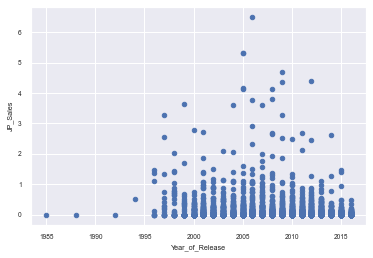

In [13]:
df.plot(kind='scatter', x='Year_of_Release', y='JP_Sales')

The scatter plot shows that there is a game that made over 6 million copies.So let's look into it. 

In [14]:
df2 = df.copy()
df2 = df2[df2['JP_Sales'] >= 4]
df2

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Developer
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,Nintendo
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,Nintendo
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,Nintendo
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.74,9.20,4.16,2.04,20.15,77.0,Nintendo
26,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.43,5.35,5.32,1.18,15.29,77.0,Nintendo
43,Animal Crossing: Wild World,DS,2005.0,Simulation,Nintendo,2.50,3.45,5.33,0.86,12.13,86.0,Nintendo
73,Animal Crossing: New Leaf,3DS,2012.0,Simulation,Nintendo,2.03,2.36,4.39,0.39,9.16,88.0,Nintendo
152,Dragon Quest IX: Sentinels of the Starry Skies,DS,2009.0,Role-Playing,Nintendo,0.63,0.67,4.35,0.15,5.78,87.0,Level 5
163,Monster Hunter Freedom Unite,PSP,2008.0,Role-Playing,Capcom,0.47,0.55,4.13,0.34,5.48,81.0,Capcom


It shows that Supermario bros was sold the most in Japan.

### Question 2: To what extent is people's preference similar?

Overall, action games and sports games were released the most for each platform. 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns#Understanding my variables

df3 = df.copy()
df3 = df3.drop(['Developer','Critic_Score','Publisher','Name'], axis=1) #getting ride of crisitc_count, user_score, rating, and user_count rows
df3=df3[df3['Global_Sales']>=5]

df3


,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.53
2,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52
3,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77
6,DS,2006.0,Platform,11.28,9.14,6.50,2.88,29.80
7,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,28.92
...,...,...,...,...,...,...,...,...
200,DS,2007.0,Action,1.85,1.80,0.95,0.48,5.08
202,PS3,2010.0,Sports,0.61,3.28,0.06,1.12,5.07
203,PS,1996.0,Action,2.05,1.16,1.11,0.73,5.05
204,PSP,2006.0,Action,1.70,1.99,0.16,1.18,5.03


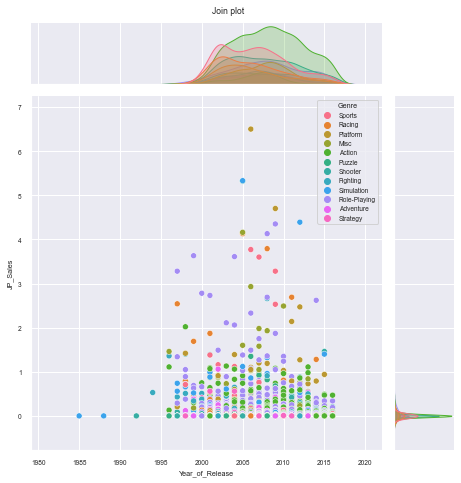

In [16]:
sns.jointplot(data=df,
              x="Year_of_Release",
              y="JP_Sales",
              hue="Genre",
              kind="scatter",   # plot kind
              height=6.5,         # plot height
             )

plt.suptitle("Join plot", y=1.02)   # adds title to the plot
plt.show()

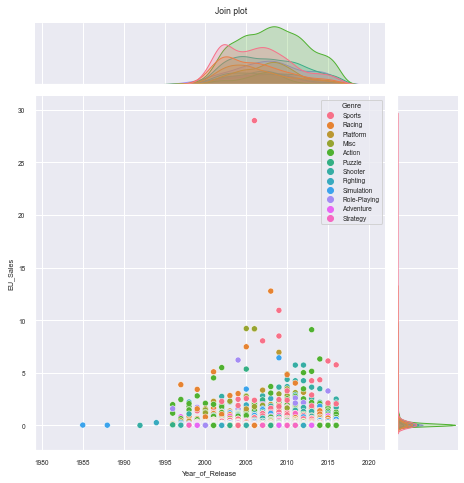

In [17]:
# set seaborn style
sns.jointplot(data=df,
              x="Year_of_Release",
              y="EU_Sales",
              hue="Genre",
              kind="scatter",   # plot kind
              height=6.5,         # plot height
             )

plt.suptitle("Join plot", y=1.02)   # adds title to the plot
plt.show()

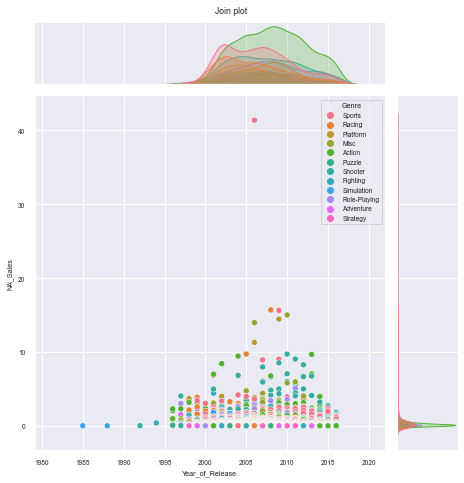

In [18]:
sns.jointplot(data=df,
              x="Year_of_Release",
              y="NA_Sales",
              hue="Genre",
              kind="scatter",   # plot kind
              height=6.5,         # plot height
             )

plt.suptitle("Join plot", y=1.02)   # adds title to the plot
plt.show()

The graph shows that action games are popular in Wii. 

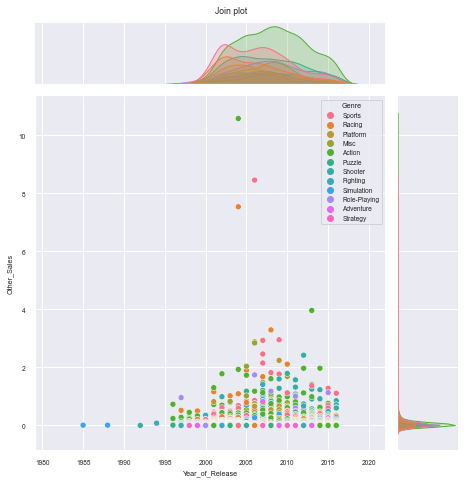

In [19]:
sns.jointplot(data=df,
              x="Year_of_Release",
              y="Other_Sales",
              hue="Genre",
              kind="scatter",   # plot kind
              height=6.5,         # plot height
             )

plt.suptitle("Join plot", y=1.02)   # adds title to the plot
plt.show()

These graphs show that many regions prefer Action games.


## Question 3: What type of games contributed to global sales in each major platform?


To find an answer, we will plot a scatter diagram showing global sales of each platform.

<AxesSubplot:xlabel='Platform', ylabel='count'>

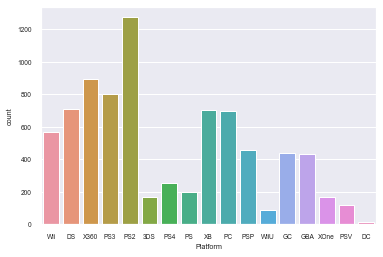

In [20]:
sns.set(font_scale=0.6)
sns.countplot(x=df_cleaned["Platform"])

For this question, we will be looking at PS2, PS3, X360, DS, and Wii. 

<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

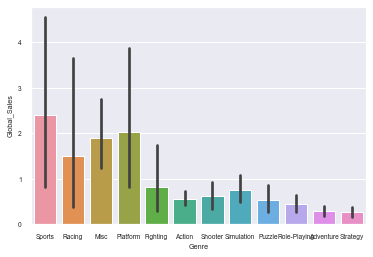

In [21]:
df2 = df_cleaned.copy()
df2 = df2[df2['Platform'] == "Wii"]
df2
sns.barplot(x=df2["Genre"],y=df2['Global_Sales'])

<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

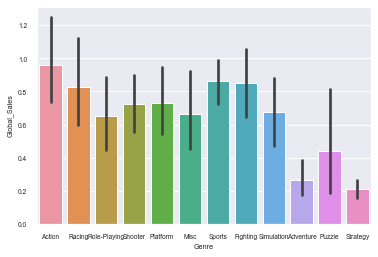

In [22]:
df2 = df_cleaned.copy()
df2 = df2[df2['Platform'] == "PS2"]
df2
sns.barplot(x=df2["Genre"],y=df2['Global_Sales'])

<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

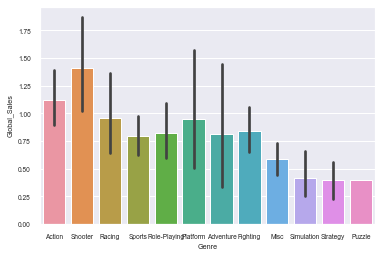

In [23]:
df2 = df_cleaned.copy()
df2 = df2[df2['Platform'] == "PS3"]
df2
sns.barplot(x=df2["Genre"],y=df2['Global_Sales'])

<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

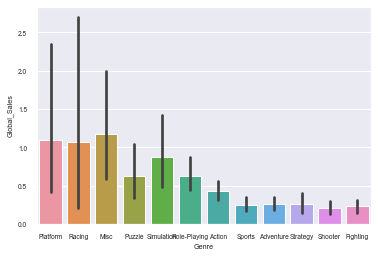

In [24]:
df2 = df_cleaned.copy()
df2 = df2[df2['Platform'] == "DS"]
df2
sns.barplot(x=df2["Genre"],y=df2['Global_Sales'])

[Text(0.5, 1.0, 'X360 Global Sales by Genre')]

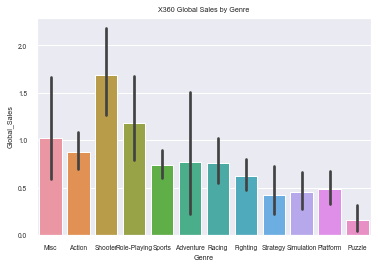

In [25]:
df2 = df_cleaned.copy()
df2 = df2[df2['Platform'] == "X360"]
df2
sns.barplot(x=df2["Genre"],y=df2['Global_Sales']).set(title="X360 Global Sales by Genre")

The graphs show that for X360, shooters game contributed the most. For DS, it was Misc games, for PS3, it was shooters, for pS2, it was action, and for wii, it was sports.

AttributeError: 'FacetGrid' object has no attribute 'get_legend'

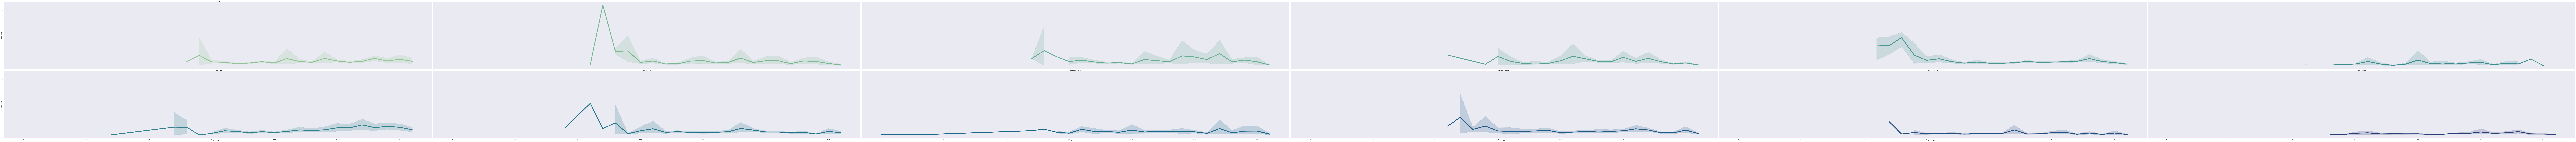

In [60]:
df2 = df
sns.set_theme(style="dark")
# Plot each year's time series in its own facet
g = sns.relplot(data=df2,x="Year_of_Release", y="Global_Sales", col="Genre", hue="Genre",kind="line", palette="crest", linewidth=8, zorder=10,col_wrap=6, height=10, aspect=6, legend=False)


### Question 4: What is the general trend for each platform?


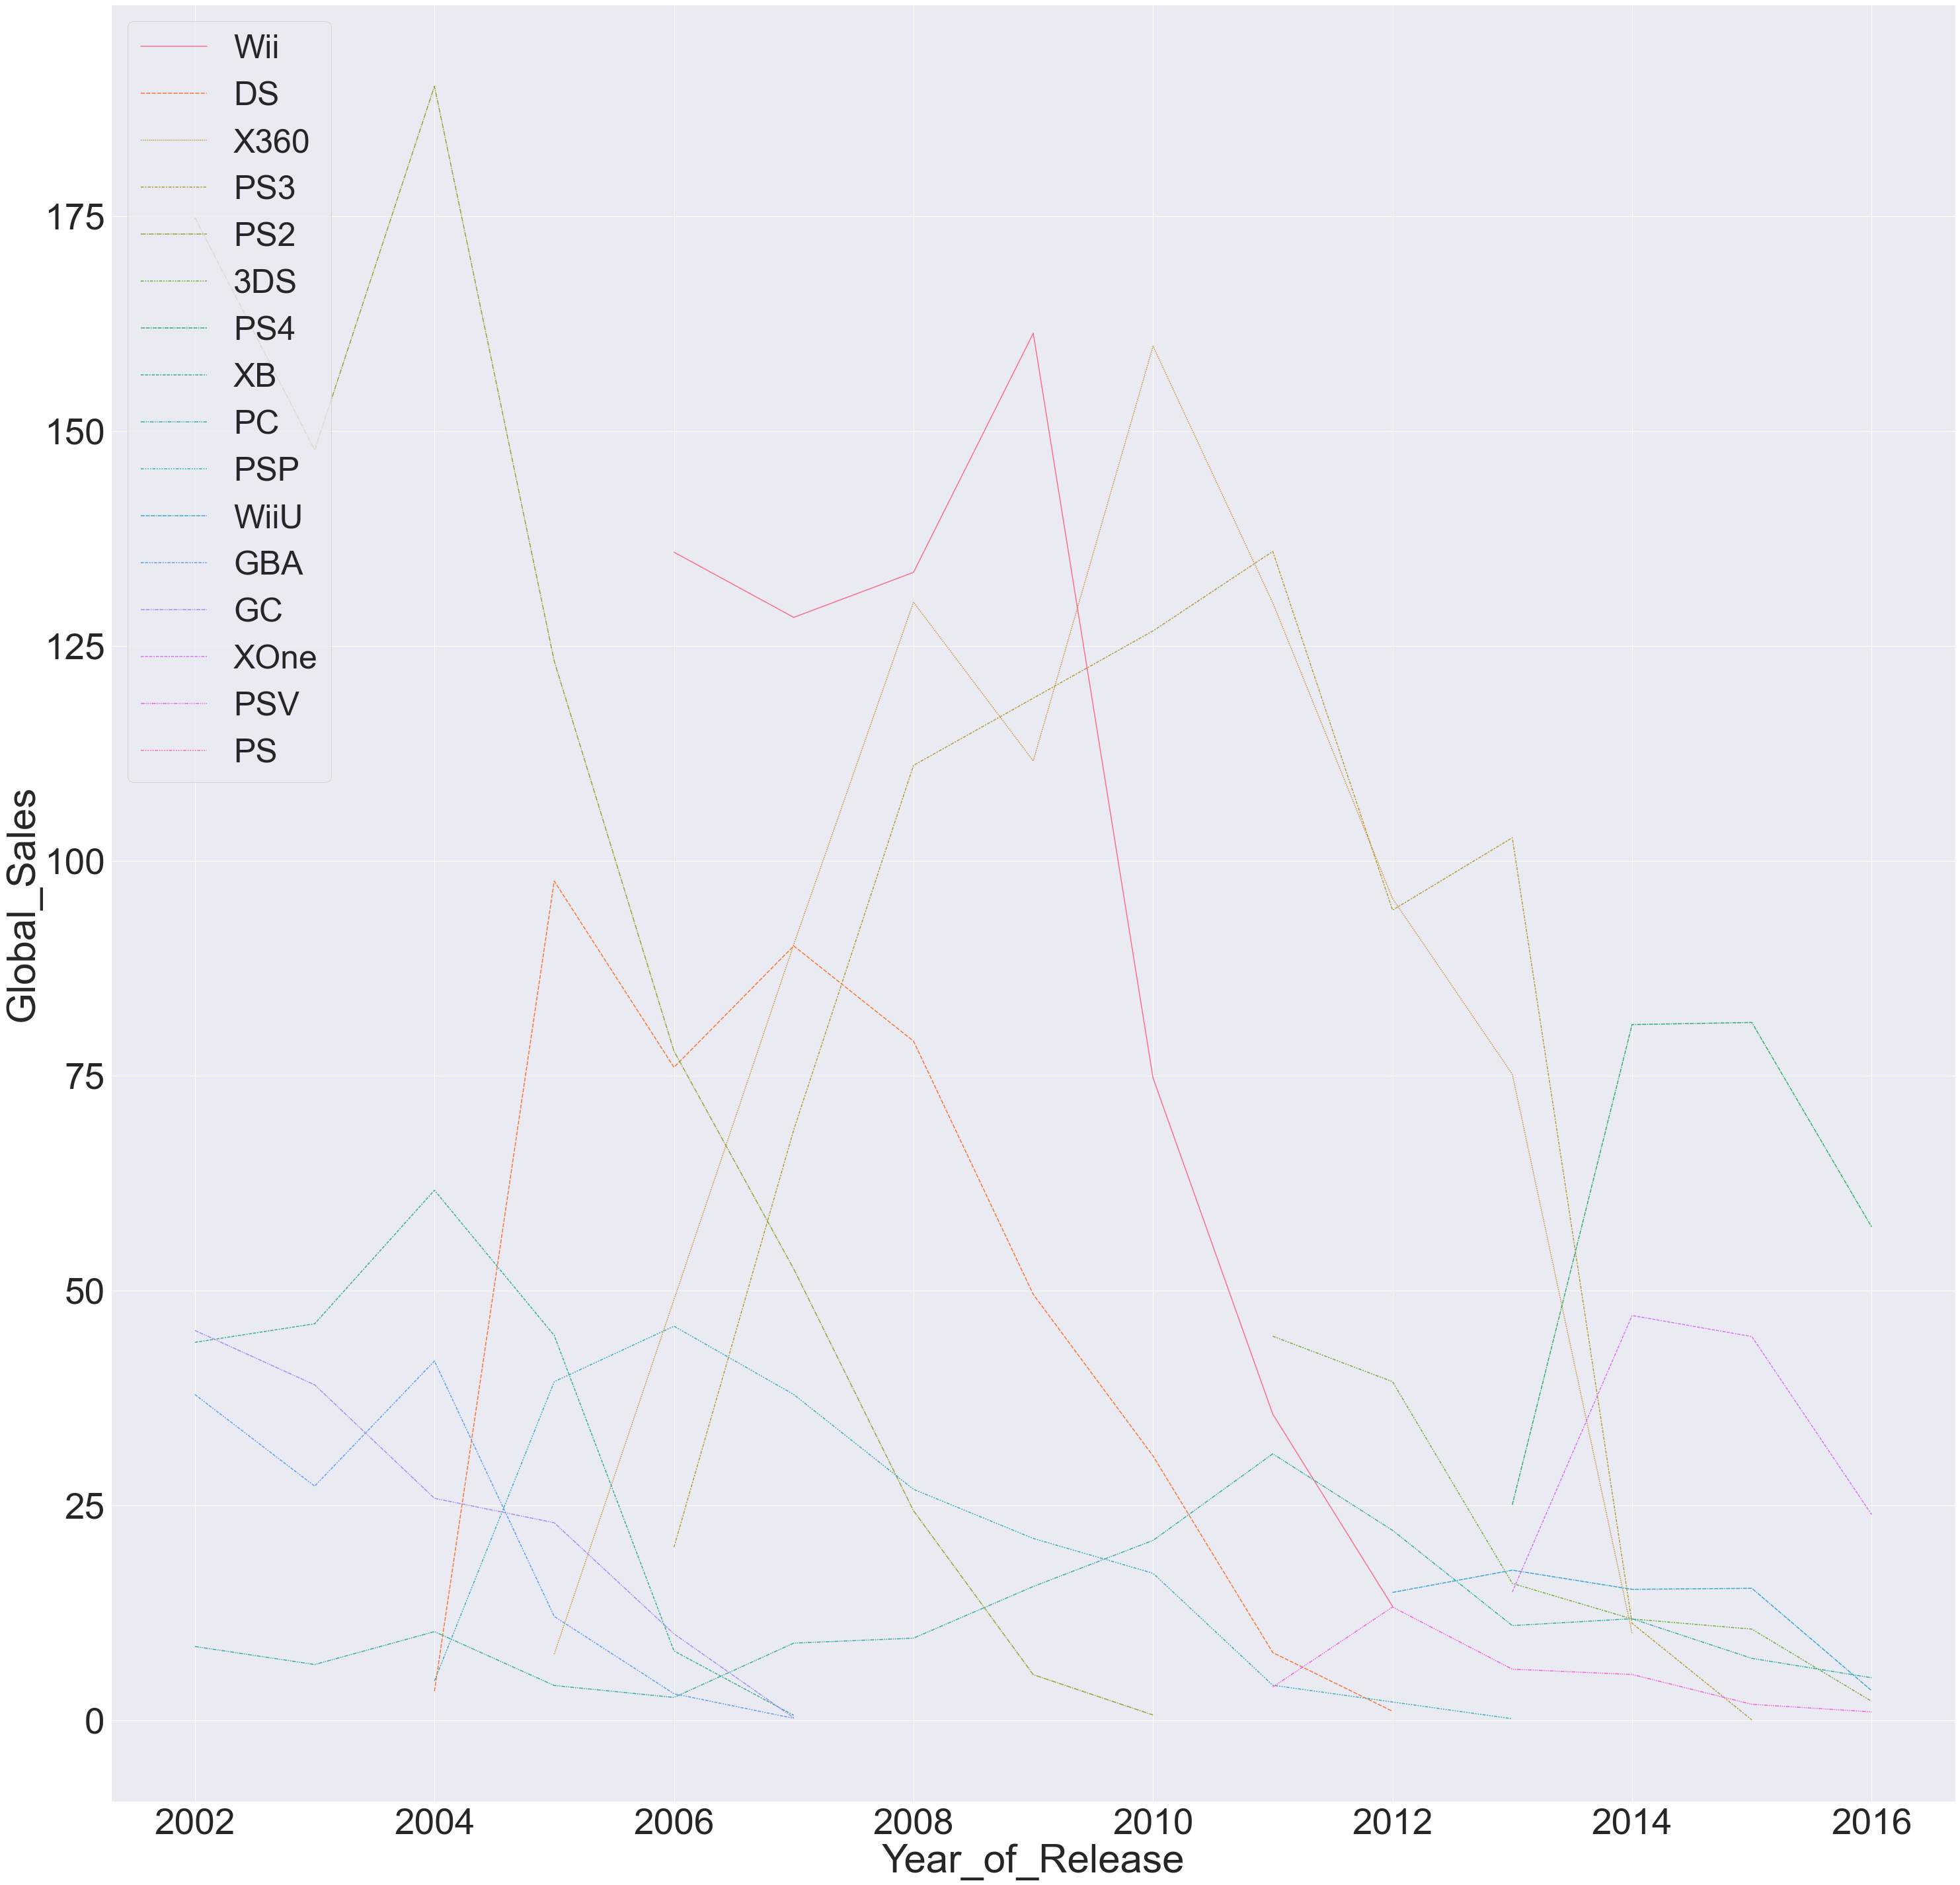

In [58]:

df2=df.copy();
df2=df2[df2['Year_of_Release']>=2002]
plot = sns.lineplot(df2, x='Year_of_Release', y='Global_Sales', hue='Platform', style="Platform", estimator =sum, errorbar=None)
plt.setp(plot.get_legend().get_texts(), fontsize='15') 
plot.legend(loc = 2, prop={'size':50})
plt.show()


The graph shows that the all platforms have decreasing global sales. 